In [1]:
import numpy as np 
import os

import pandas as pd
df = pd.read_excel("data/DF_for_communautes_new_datas_2021_10_08.xlsx", engine="openpyxl",
                   dtype = "object")
df.head()

,post_id,forum_name,forum_id,source.x,discussion_url,discussion_id,pseudo,pseudo_id,Language,prise,...,favourites_count,account_created_at,verified,profile_url,profile_expanded_url,account_lang,profile_banner_url,profile_background_url,profile_image_url,virality
0,1443728466000613385,twitter,22,BW,http://twitter.com/DerangeOm/statuses/14437284...,NaN,DerangeOm,DerangeOm#twitter,fr,NaN,...,2138,2020-10-01 00:38:42,False,https://t.co/ovdZKKRaMl,https://venteom.blogspot.com/,NaN,https://pbs.twimg.com/profile_banners/13114654...,NaN,http://pbs.twimg.com/profile_images/1347390853...,1
1,1443729154692767746,twitter,22,BW,http://twitter.com/Jml_OM/statuses/14437291546...,NaN,Jml_OM,Jml_OM#twitter,fr,NaN,...,5303,2015-06-03 22:55:41,False,NaN,NaN,NaN,https://pbs.twimg.com/profile_banners/33074922...,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1444579735...,2
2,1443735128249884679,twitter,22,BW,http://twitter.com/om64300/statuses/1443735128...,NaN,om64300,om64300#twitter,fr,NaN,...,96,2021-02-25 15:38:32,False,NaN,NaN,NaN,https://pbs.twimg.com/profile_banners/13649629...,NaN,http://pbs.twimg.com/profile_images/1408919082...,3
3,1443742470785880064,twitter,22,BW,http://twitter.com/om64300/statuses/1443742470...,NaN,om64300,om64300#twitter,fr,NaN,...,96,2021-02-25 15:38:32,False,NaN,NaN,NaN,https://pbs.twimg.com/profile_banners/13649629...,NaN,http://pbs.twimg.com/profile_images/1408919082...,0
4,1443749142778499081,twitter,22,BW,http://twitter.com/om64300/statuses/1443749142...,NaN,om64300,om64300#twitter,fr,NaN,...,96,2021-02-25 15:38:32,False,NaN,NaN,NaN,https://pbs.twimg.com/profile_banners/13649629...,NaN,http://pbs.twimg.com/profile_images/1408919082...,0


In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE 

In [3]:
addtionnals_stopwords = ['om', 'olympique', 'venteom', 'https', 'http', 'co', 'marseille', 'teamom', 'va', 'ca', 'si', 'oui', 'vous', 'tout', 'fait', 'être']

additionnals_stop = ['vou', 'tous', 'bon', 'encore', 'faire', 'cette', 'plus', 
                    'quoi', 'rien', 'dit', 'comme', 'ça', 'très', 'bien',
                    'cette', 'quand', 'club', 'court', 'avoir', 'selon', 'aujourd', 'hui',
                    'là', 'alors', 'sû', 'donc', 'comment', 'aussi', 'dire', 'faut', 'peut',
                    'là', 'toujours']

In [5]:
import nltk

from nltk.corpus import stopwords


In [7]:
df.columns

Index(['post_id', 'forum_name', 'forum_id', 'source.x', 'discussion_url',
       'discussion_id', 'pseudo', 'pseudo_id', 'Language', 'prise',
       ...
       'favourites_count', 'account_created_at', 'verified', 'profile_url',
       'profile_expanded_url', 'account_lang', 'profile_banner_url',
       'profile_background_url', 'profile_image_url', 'virality'],
      dtype='object', length=110)

In [8]:
'text' in df.columns

True

In [9]:
df.text[0]

'Un serveur vocale sera bientôt mis à disposition pour les consultations prioritaires\nLors de votre appel, il vous sera demandé un mot de passe afin de valider votre état "caniche", ci-dessous les futurs mots passes :\nIchem, Gilles, Sportmed, Massilia, TV, MM, AWBT, AS\n\n#venteom'

In [10]:
type(df.text[0])

str

In [12]:
test_df = df[df.text.notna()]

In [13]:
print(df.shape, test_df.shape)

(2382, 110) (2359, 110)


In [32]:
tfidf = TfidfVectorizer(
    min_df = 5,
    max_df = 0.95,
    max_features = 2000,
    stop_words = stopwords.words('french') + addtionnals_stopwords + additionnals_stop + add_stop
)
tfidf.fit(test_df.text)
text = tfidf.transform(test_df.text)

Fit 2 clusters
Fit 4 clusters
Fit 6 clusters
Fit 8 clusters
Fit 10 clusters
Fit 12 clusters
Fit 14 clusters
Fit 16 clusters
Fit 18 clusters
Fit 20 clusters
Fit 22 clusters
Fit 24 clusters
Fit 26 clusters
Fit 28 clusters
Fit 30 clusters
Fit 32 clusters
Fit 34 clusters
Fit 36 clusters
Fit 38 clusters
Fit 40 clusters
Fit 42 clusters
Fit 44 clusters
Fit 46 clusters
Fit 48 clusters
Fit 50 clusters


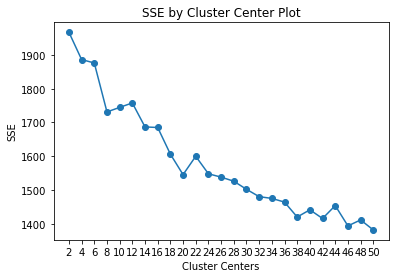

In [33]:
def find_optimal_clusters(data, max_k):
    iters = range(2, max_k+1, 2)
    
    sse = []
    for k in iters:
        sse.append(MiniBatchKMeans(n_clusters=k, init_size=1024, batch_size=2048, random_state=20).fit(data).inertia_)
        print('Fit {} clusters'.format(k))
        
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')
    
find_optimal_clusters(text, 50)

In [28]:
clusters = MiniBatchKMeans(n_clusters=10, init_size=1024, batch_size=256, random_state=20).fit_predict(text)

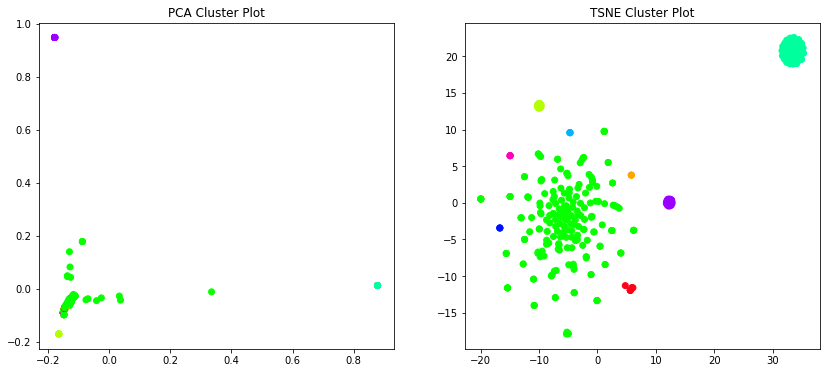

In [34]:
def plot_tsne_pca(data, labels):
    max_label = max(labels)
    max_items = np.random.choice(range(data.shape[0]), size=300, replace=False)
    
    pca = PCA(n_components=2).fit_transform(data[max_items,:].todense())
    tsne = TSNE().fit_transform(PCA(n_components=50).fit_transform(data[max_items,:].todense()))
    
    
    idx = np.random.choice(range(pca.shape[0]), size=300, replace=False)
    label_subset = labels[max_items]
    label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]]
    
    f, ax = plt.subplots(1, 2, figsize=(14, 6))
    
    ax[0].scatter(pca[idx, 0], pca[idx, 1], c=label_subset)
    ax[0].set_title('PCA Cluster Plot')
    
    ax[1].scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset)
    ax[1].set_title('TSNE Cluster Plot')
    
plot_tsne_pca(text, clusters)

In [35]:
def get_top_keywords(data, clusters, labels, n_terms):
    df = pd.DataFrame(data.todense()).groupby(clusters).mean()
    
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([labels[t] for t in np.argsort(r)[-n_terms:]]))
            
get_top_keywords(text, clusters, tfidf.get_feature_names(), 10)


Cluster 1
privé,accélérer,marque,confondre,smileys,beaux,pensant,réjouissent,supporters,fond

Cluster 2
exclusives,excuses,évidemment,thibaudvezirian,beaucoup,aime,serguei,crois,ami,centurionagency

Cluster 3
racheter,insiders,rachat,annoncé,jamais,thibaudvezirian,pif,saoudiens,newcastle,vente

Cluster 4
exclusives,espère,excuses,exister,existe,ceux,mercatom,tweet,augmenter,écrivent

Cluster 5
essaien589,espérer,espère,info,city,group,football,sortie,genre,saoudiennes

Cluster 6
exclusives,excuse,excuses,existe,exister,explication,explique,bizarre,citdszklpl,venaient

Cluster 7
existe,exister,explication,explique,escroquerie,fils,stade,mérite,interdiction,vélodrome

Cluster 8
thibaudvezirian,insiders,fake,rumeurs,info,conclure,verre,bassiné,lève,nis3qqrin6

Cluster 9
mal,tapiestephane,teamom_officiel,om_officiel,premier,rendre,fils,hommage,pute,dièse


In [31]:
add_stop = ['txb4lbkah3', 'zbss6lco6f', 'vttbwtd56m', 'gbtz13','co78127721', 'art89910795', 'tfu4yeu2cg',
           'mec', 'art89910795', 'mot', 'toute', 'slt', 'depuis', 'ya', 'luiscamposfc_', 'zc49y9lc9y', 'patms4',
           'cela', 'ect', 'evydlqngob', 'cf8ph8pjw7', 'entre', 'rt', 'follow', 'abonnés', 'appel', 'back', 'abonnez',
           'cas', 'vite', 'sauce', 'pwjtb1whkw', 'etre', 'ben6377']

In [36]:
from collections import Counter

In [37]:
Counter(clusters)

Counter({3: 1778, 4: 316, 9: 36, 6: 39, 2: 54, 1: 18, 8: 42, 7: 56, 5: 20})

In [38]:
test_df['cluster_msg'] = clusters

<ipython-input-38-e39b0821eca5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['cluster_msg'] = clusters


In [39]:
test_df['cluster_msg'].value_counts()

3    1778
4     316
7      56
2      54
8      42
6      39
9      36
5      20
1      18
Name: cluster_msg, dtype: int64

In [40]:
import networkx as nx
import networkx.algorithms as community
from community import community_louvain

In [42]:
G = nx.MultiGraph()


for i,j in test_df[test_df.retweet_screen_name.notna()][["screen_name", "retweet_screen_name", 'cluster_msg', 'virality' ,'hashtags', 'location' ,'created_at']].iterrows():
    
    G.add_edge(j.screen_name, j.retweet_screen_name, j.cluster_msg ,date = j.created_at)
    
    
print(G.number_of_nodes(), G.number_of_edges())
Gc = nx.subgraph(G, max(nx.connected_components(nx.Graph(G)), key=len))
print(Gc.number_of_nodes(), Gc.number_of_edges())
comms = community_louvain.best_partition(nx.Graph(Gc))

535 607
438 549


In [43]:
result_communautes = dict()
for k in comms.keys():
    if comms[k] in result_communautes:
        result_communautes[comms[k]].append(k)
    else:
        result_communautes[comms[k]] = [k]

In [44]:
for i in range(len(result_communautes)):
    print(i, len(result_communautes[i]))

0 7
1 46
2 44
3 7
4 64
5 42
6 10
7 43
8 25
9 9
10 7
11 4
12 30
13 31
14 38
15 31


In [45]:
os.getcwd()

'C:\\Users\\mickail\\Documents\\VenteOM'

In [47]:
## Store the results: 
import json
f = open("Communautes_nouvelle_extraction/communautes_composante_principale_2021_10_08.json","w")
json.dump(comms, f)
f.close()

In [49]:
# Opening JSON community file 
f = open("Communautes_nouvelle_extraction/communautes_composante_principale_2021_10_08.json",)
communities_df = json.load(f)
f.close()
communities_df = pd.json_normalize(communities_df).T
communities_df['screen_name'] = communities_df.index
communities_df.columns = ['community','screen_name']
communities_df.head()
test_df = test_df.merge(communities_df, how='outer', on = 'screen_name')

In [59]:
%history -g

 1/1: !python -V
 2/1: !pip install pandas
 2/2: import pandas as pd
 2/3: import numpy as np
 2/4: import matplotlib.pyplot as plt
 2/5: import seaborn as sns
 2/6: import keras
 2/7: import torch
 2/8: import xgboost
 2/9: !pip install fast-bert
2/10: !pip install tensorflow==2.5.0
2/11: !pip install tensorflow==2.5.0 --user
2/12: import keras
2/13: !pip install keras
2/14: import keras
2/15: !pip install keras
2/16: import keras
2/17: from tensorflow import keras
2/18: import tensorflow
 3/1: import pandas as pd
 3/2: import numpy as np
 3/3: import matplotlib.pyplot as plt
 3/4: import seaborn as sns
 3/5: import keras
 3/6: import xgboost
 3/7: !pip install xgboost==1.1.0
 3/8: import xgboost
 3/9: import sklearn
3/10: sklearn.__version__
3/11: !conda install pytorch torchvision torchaudio cpuonly -c pytorch
3/12: import torch
 5/1: import numpy as np
 5/2:
import numpy as np 
import os
 5/3: os.getcwd()
 5/4:
import pandas as pd
df = pd.read_excel("/Communautes/VenteOM_corpus_ana

In [ ]:
2326-946-922-405

In [55]:
test_df['source.y'].value_counts()

Twitter for iPhone           946
Twitter for Android          922
Twitter Web App              405
Twitter for iPad              16
Mashup Web                     7
My own lovely app              5
Twitter for ZTE                5
TheMemeBot_                    3
Fenix 2                        3
dlvr.it                        2
tweetbot-kornflex6             2
Jeudi Photo                    2
cocolocco62 test               2
Prohelper                      2
C'est parti mon kiki           2
lnx621-app                     2
helpro                         2
domicilefixe-dev2              2
Newhelpers                     2
Pornhub+                       2
Letltt                         2
Twitter for Wiko               2
lospollos-test                 2
RespondSafe                    2
Matport                        2
PSGBotLive                     2
winn                           2
jeremia-dev                    2
Marine app 15                  1
mrproverbe                     1
Qui a TT? 

In [50]:
test_df.community.value_counts()

1.0     281
7.0     236
4.0     172
13.0    141
15.0    134
2.0     102
5.0     101
14.0     91
8.0      86
12.0     75
6.0      43
3.0      27
0.0      19
9.0      19
10.0     17
11.0      8
Name: community, dtype: int64

In [51]:
test_df.to_excel("Communautes_nouvelle_extraction/VenteOM_tweets_with_communities_V3_2021_10_08.xlsx")
communities_df.to_excel("Communautes_nouvelle_extraction/VenteOM_users_with_communities_V3_2021_10_08.xlsx")

In [58]:
os.getcwd()

'C:\\Users\\mickail\\Documents\\VenteOM'